# Gaussian Process Regression

In [1]:
# Make inline plots vector graphics instead of raster graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Plotting
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [9.5, 6]
plt.rcParams['font.size'] = 18 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}', r'\usepackage{amsmath}']

## Generate Toy Data

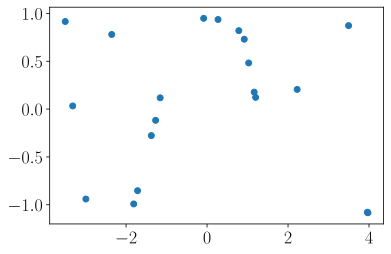

In [2]:
import numpy as np
import GPy

# Toy data
n = 20
X = np.random.uniform(-4., 4., (n,1))
Y = np.cos(X ** 2) + np.random.normal(size=(n, 1)) * 0.05

plt.scatter(X, Y)
plt.show()

## Kernel Gram Matrix

In [3]:
# Kernel
kernel = GPy.kern.RBF(input_dim=1, variance=2, lengthscale=.5)

# Kernel Gram Matrix
K = kernel.K(X=X, X2=X)
sigma = .1
B = K + sigma * np.eye(K.shape[0])

## GP Inference

{'dataplot': [<matplotlib.collections.PathCollection at 0x1226f96d8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x10cd3ec50>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1226f9ba8>]}

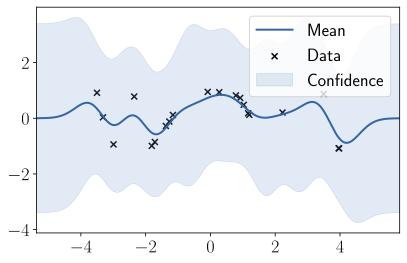

In [4]:
# GP
m = GPy.models.GPRegression(X,Y,kernel)
m.plot()

## Explicit Inference via Probabilistic Numerical Method

In [7]:
from probnum.linalg import problinsolve

# New inputs
m = 100
x_new = np.linspace(-4, 4, m)[:, None]
k_new = kernel.K(x_new, X).T
print(k_new.shape)

# Probabilistic linear solver
By, Bhat, Binv, info = problinsolve(B, Y)
print(info)
varlist = []
for i in range(m): # inefficient to solve separately?
    k_new_tmp = k_new[:, i]
    # Time this
    Bknew, Bhat, Binv, info = problinsolve(B, k_new_tmp, A0=Bhat, Ainv0=Binv)
    
    # marginal variance
    x_new_tmp = x_new[i, :]
    varlist.append(kernel.K(x_new_tmp[:, None], x_new_tmp[:, None]) - k_new_tmp.T @ Bknew)

# Mean and marginal variance
mean = k_new.T @ By
var = np.array(varlist)

print(mean)
print(var)

(20, 100)
{'iter': 16, 'maxiter': 200, 'resid_l2norm': 5.674851442866137e-07, 'conv_crit': 'resid', 'matrix_cond': None}


ValueError: Cannot instantiate normal distribution with mean of type ndarray and covariance of type float.

In [ ]:
# Plot
